In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

### load data

In [4]:
df=pd.read_csv("/kaggle/input/advertising-dataset/advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# EDA

### Get information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### there is no null values

### Get describe

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### visualization

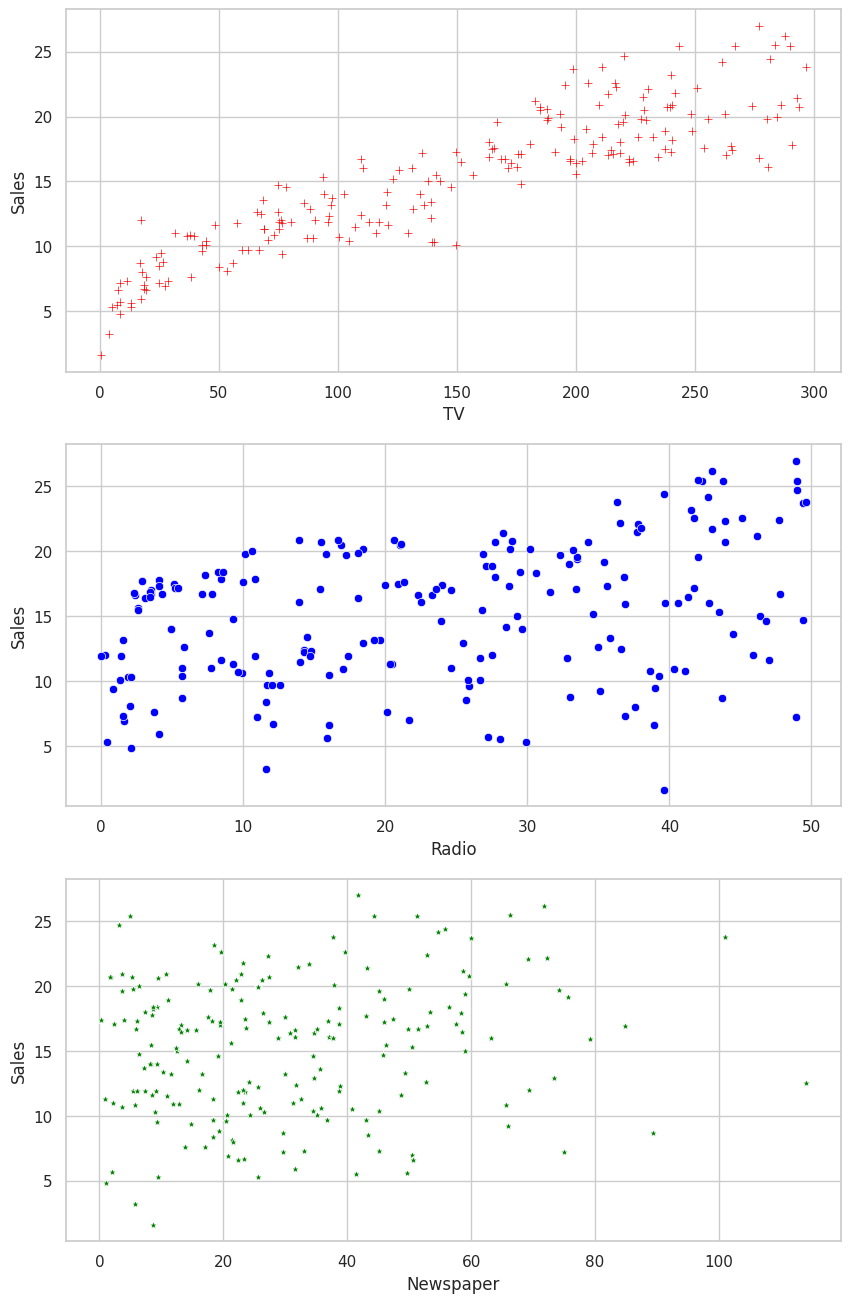

In [33]:
plt.figure(figsize=(10, 16))

# first subplot 
plt.subplot(3,1,1)
plt.xlabel("TV")
plt.ylabel("Sales")
sns.scatterplot(x=df["TV"],y=df["Sales"] , color="red" , marker="+")


# second subplot 
plt.subplot(3,1,2)
plt.xlabel("Radio")
plt.ylabel("Sales")
sns.scatterplot(x=df["Radio"],y=df["Sales"] , color="blue", marker= "o")


# Third subplot 
plt.subplot(3,1,3)
plt.xlabel("Newspaper")
plt.ylabel("Sales")
sns.scatterplot(x=df["Newspaper"],y=df["Sales"] , color="green",marker= "*")

plt.show()


## data preprocessing


In [79]:
x=df["TV"]
y=df["Sales"]
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_test


array([[0.55765979],
       [0.98816368],
       [0.1481231 ],
       [0.65843761],
       [0.58099425],
       [0.52722354],
       [0.9773419 ],
       [0.32735881],
       [0.08826513],
       [0.45180927],
       [0.02231992],
       [0.4721001 ],
       [0.73621914],
       [0.32296246],
       [0.2316537 ],
       [0.90023673],
       [0.58978695],
       [0.50997633],
       [0.25600271],
       [0.93337842],
       [0.73385188],
       [0.37943862],
       [0.59621238],
       [0.4808928 ],
       [0.02705445],
       [0.85593507],
       [0.68785932],
       [0.23638823],
       [0.44098749],
       [0.14879946],
       [0.36895502],
       [0.20831924],
       [0.36895502],
       [0.71051742],
       [0.12614136],
       [0.22387555],
       [0.5539398 ],
       [0.19918837],
       [0.95671288],
       [0.5732161 ]])

## data modeling

In [80]:
from sklearn.linear_model import LinearRegression 
model=LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [81]:
model.score(x_train , y_train)

0.8104827616667938

In [82]:
model.score(x_test , y_test)

0.8190605506663

In [83]:
model.predict([[523]])

array([[335.91794621]])

In [84]:
y_pred=model.predict(x_test)
y_pred

array([[0.57138178],
       [0.84771467],
       [0.30850737],
       [0.63606929],
       [0.58635976],
       [0.55184528],
       [0.84076836],
       [0.42355562],
       [0.27008559],
       [0.50343819],
       [0.22775652],
       [0.51646252],
       [0.68599589],
       [0.42073369],
       [0.3621242 ],
       [0.7912759 ],
       [0.59200364],
       [0.5407746 ],
       [0.37775339],
       [0.81254897],
       [0.68447639],
       [0.45698474],
       [0.59612801],
       [0.52210639],
       [0.23079553],
       [0.76283944],
       [0.65495457],
       [0.36516321],
       [0.49649188],
       [0.30894151],
       [0.4502555 ],
       [0.34714622],
       [0.4502555 ],
       [0.6694984 ],
       [0.29439768],
       [0.35713154],
       [0.56899398],
       [0.34128527],
       [0.82752695],
       [0.5813671 ]])

<Axes: xlabel='TV', ylabel='Sales'>

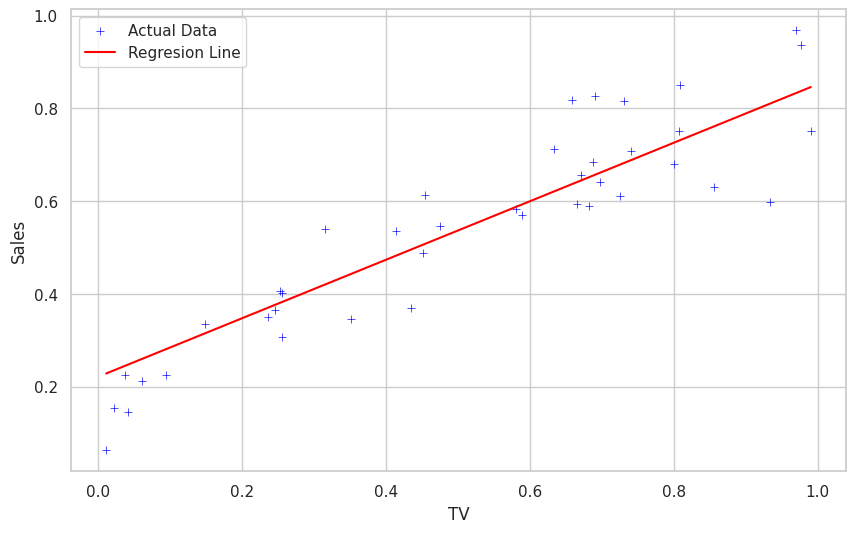

In [72]:
y_pred = y_pred.flatten()
y_test = y_test.flatten()
x_test = x_test.flatten()
plt.figure(figsize=(10, 6))
plt.xlabel("TV")
plt.ylabel("Sales")
sns.scatterplot(x=x_test,y=y_test , color="blue" , marker="+" , label="Actual Data")
sns.lineplot(x=x_test,y=y_pred , color="red" ,label="Regresion Line" )